In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from data_conversion import human_readable_to_float, ensure_is_float

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
data_directory = "data/mind_your_gap/"
patents_df = pd.read_csv( data_directory + "patents_granted_total.csv", usecols=["country", "2000"] )
patents_df = patents_df.fillna( 0 )

for col in patents_df.columns:
    if col == "country":
        continue
    patents_df[col] = patents_df[col].apply( ensure_is_float )

patents_df.head()

,country,2000
0,Aruba,0.0
1,Albania,203.0
2,Argentina,1590.0
3,Armenia,168.0
4,Australia,13900.0


In [18]:
gdp_df = pd.read_csv( data_directory + "total_gdp_ppp_inflation_adjusted.csv", usecols=["country", "2000"])

for col in gdp_df.columns:
    if col == "country":
        continue
    gdp_df[col] = gdp_df[col].apply( ensure_is_float )

gdp_df.head()

,country,2000
0,Aruba,3.940000e+09
1,Afghanistan,2.040000e+10
2,Angola,4.650000e+10
3,Anguilla,1.720000e+08
4,Albania,1.700000e+10


In [20]:
patents_df = patents_df.rename( columns = {"2000": "patents"} )
gdp_df = gdp_df.rename( columns = {"2000": "gdp"} )

data = pd.merge( left = patents_df, right = gdp_df, on = "country" )
data.head()

,country,patents,gdp
0,Aruba,0.0,3.940000e+09
1,Albania,203.0,1.700000e+10
2,Argentina,1590.0,4.250000e+11
3,Armenia,168.0,9.290000e+09
4,Australia,13900.0,6.610000e+11


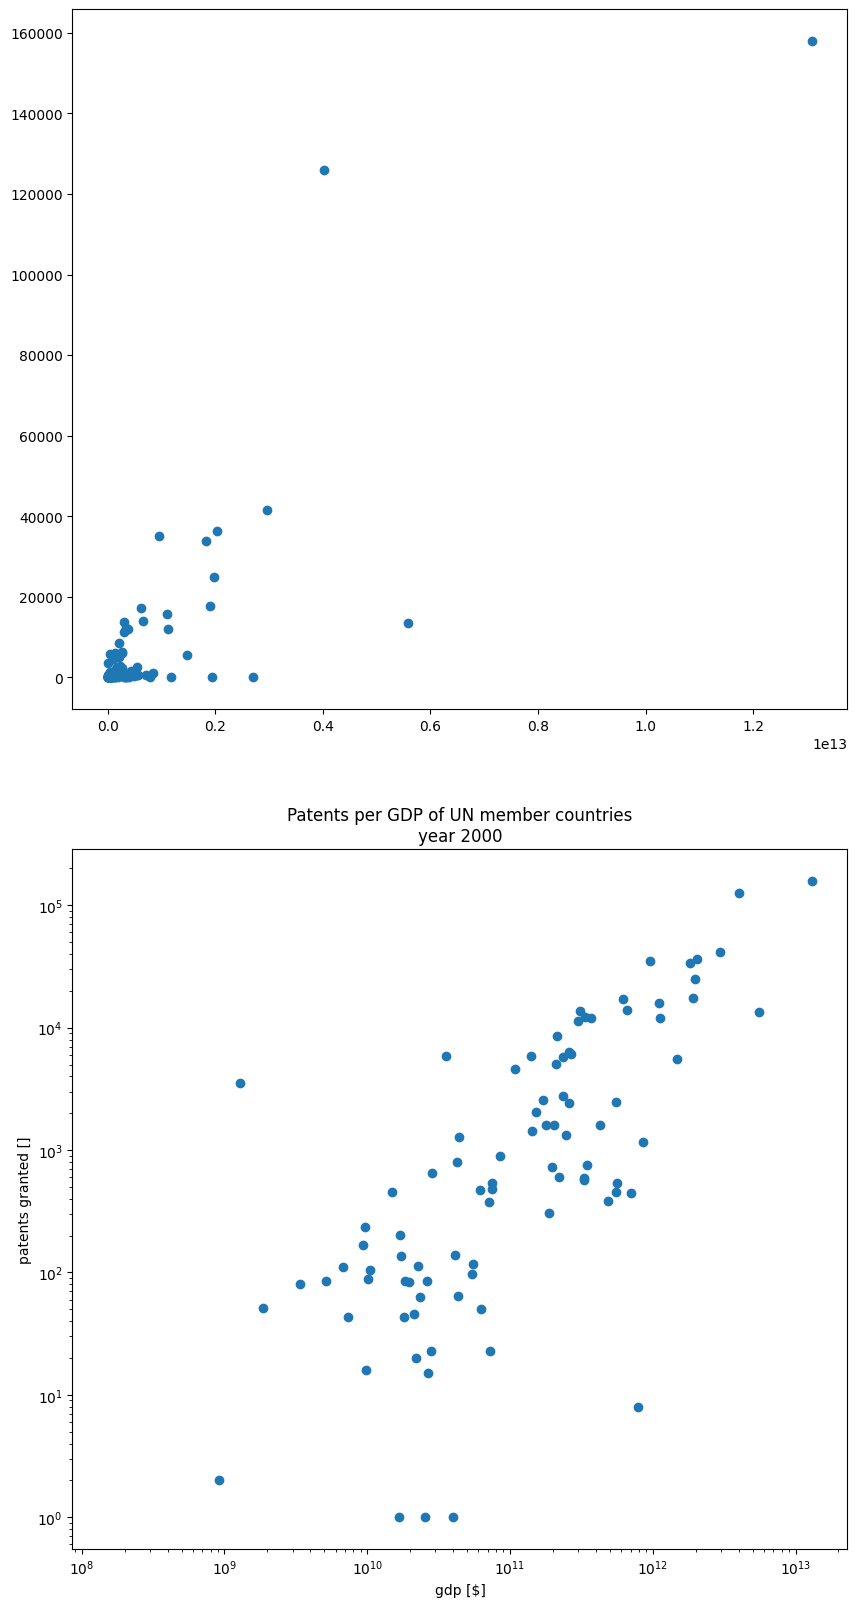

In [27]:
fig,axis = plt.subplots( 2, figsize=(10,20) )

axis[0].scatter( x = data["gdp"], y = data["patents"])

axis[1].set_title("Patents per GDP of UN member countries\nyear 2000")
axis[1].scatter( x = data["gdp"], y = data["patents"])
axis[1].set_xlabel('gdp [$]')
axis[1].set_ylabel('patents granted []')
axis[1].set_xscale('log')
axis[1].set_yscale('log')

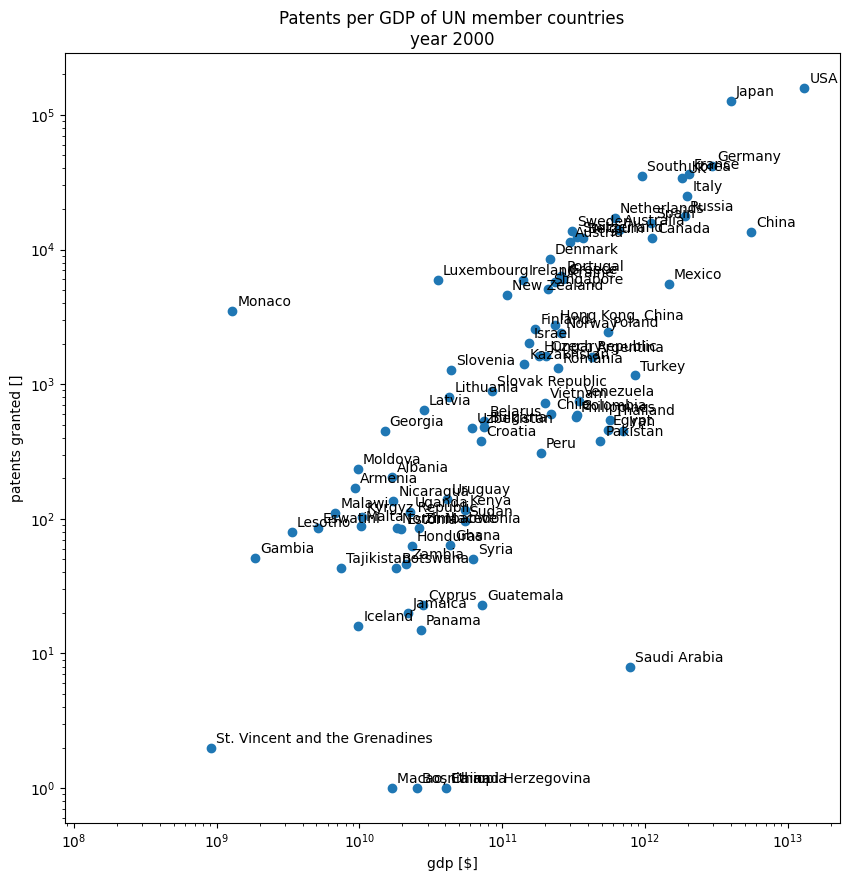

In [29]:
fig,axis = plt.subplots( 1, figsize=(10,10) )

axis.set_title("Patents per GDP of UN member countries\nyear 2000")
axis.scatter( x = data["gdp"], y = data["patents"])
axis.set_xlabel('gdp [$]')
axis.set_ylabel('patents granted []')
axis.set_xscale('log')
axis.set_yscale('log')

annotations = []
for row in data.itertuples():
    annotation = axis.annotate(row.country, (row.gdp, row.patents), textcoords = 'offset pixels', xytext = (5,5) )
    annotations.append( annotation )

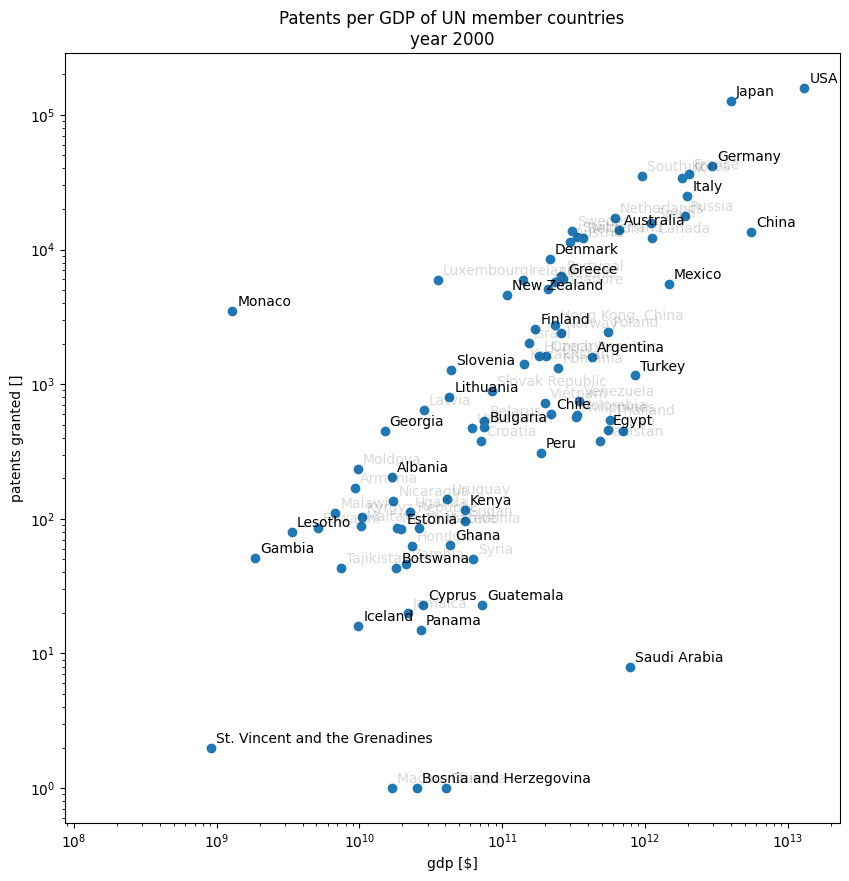

In [30]:
def overlaps( bbox_a, bbox_b ):
    if bbox_a.x0 > bbox_b.x1:
        return False
    if bbox_a.x1 < bbox_b.x0:
        return False
    if bbox_a.y0 > bbox_b.y1:
        return False
    if bbox_a.y1 < bbox_b.y0:
        return False
    return True 

fig,axis = plt.subplots( 1, figsize=(10,10) )

axis.set_title("Patents per GDP of UN member countries\nyear 2000")
axis.scatter( x = data["gdp"], y = data["patents"])
axis.set_xlabel('gdp [$]')
axis.set_ylabel('patents granted []')
axis.set_xscale('log')
axis.set_yscale('log')

annotations = []
for row in data.itertuples():
    annotation = axis.annotate(row.country, (row.gdp, row.patents), textcoords = 'offset pixels', xytext = (5,5) )
    annotations.append( annotation )

for i, a in enumerate( annotations ):
    for j, b in enumerate( annotations[ i+1: ], start=i+1 ):
        bbox_a = a.get_window_extent()
        bbox_b = b.get_window_extent()
        if overlaps( bbox_a, bbox_b ):
            b.set_alpha( 0.15 )

In [31]:
pop_df = pd.read_csv( data_directory + "pop.csv", usecols=["country", "2000"])

for col in pop_df.columns:
    if col == "country":
        continue
    pop_df[col] = pop_df[col].apply( ensure_is_float )

pop_df.head()

,country,2000
0,Afghanistan,20100000.0
1,Angola,16200000.0
2,Albania,3170000.0
3,Andorra,65700.0
4,UAE,3490000.0


In [32]:
pop_df = pop_df.rename( columns = {"2000": "population"} )

data = pd.merge( left = data, right = pop_df, on = "country" )
data.head()

,country,patents,gdp,population
0,Albania,203.0,1.700000e+10,3170000.0
1,Argentina,1590.0,4.250000e+11,37200000.0
2,Armenia,168.0,9.290000e+09,3130000.0
3,Australia,13900.0,6.610000e+11,19100000.0
4,Austria,11300.0,3.000000e+11,8010000.0


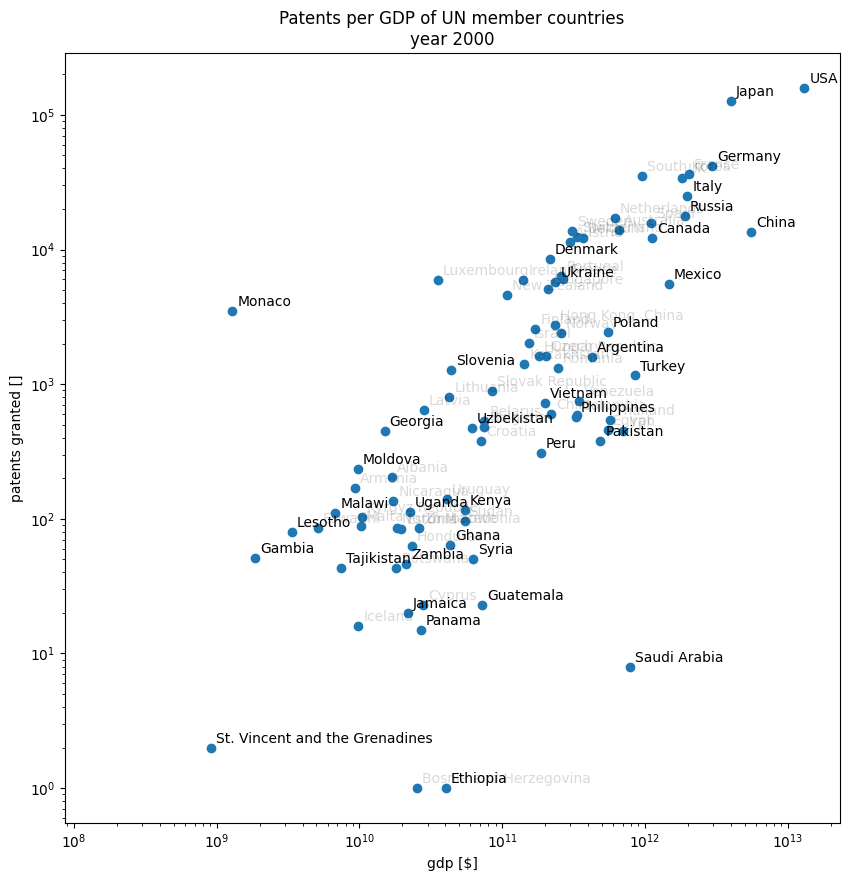

In [34]:
fig,axis = plt.subplots( 1, figsize=(10,10) )

axis.set_title("Patents per GDP of UN member countries\nyear 2000")
axis.scatter( x = data["gdp"], y = data["patents"])
axis.set_xlabel('gdp [$]')
axis.set_ylabel('patents granted []')
axis.set_xscale('log')
axis.set_yscale('log')

annotations = []
for row in data.itertuples():
    annotation = axis.annotate(row.country, (row.gdp, row.patents), textcoords = 'offset pixels', xytext = (5,5) )
    annotation.data = row
    annotations.append( annotation )

for i, a in enumerate( annotations ):
    for j, b in enumerate( annotations[ i+1: ], start=i+1 ):
        bbox_a = a.get_window_extent()
        bbox_b = b.get_window_extent()
        if overlaps( bbox_a, bbox_b ):
            if a.data.population < b.data.population:
                a.set_alpha( 0.15 )
            else:
                b.set_alpha( 0.15 )

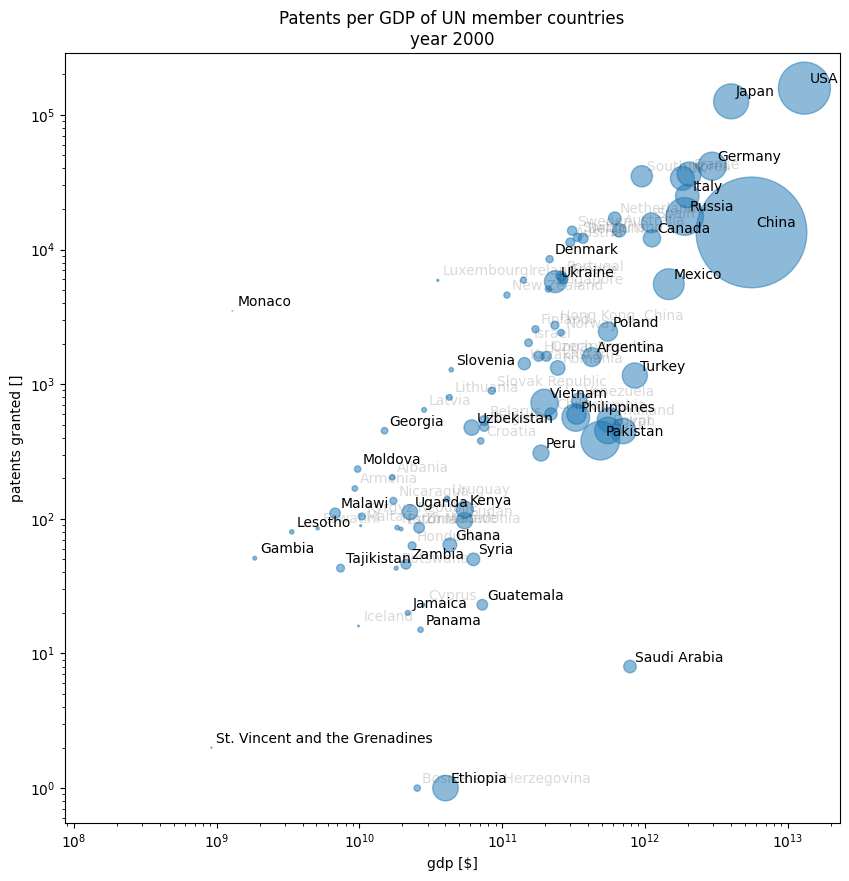

In [38]:
fig,axis = plt.subplots( 1, figsize=(10,10) )

axis.set_title("Patents per GDP of UN member countries\nyear 2000")

data["marker_size"] = data["population"] / 200000

axis.scatter( x = data["gdp"], y = data["patents"], s = data["marker_size"], alpha = 0.50 )
axis.set_xlabel('gdp [$]')
axis.set_ylabel('patents granted []')
axis.set_xscale('log')
axis.set_yscale('log')

annotations = []
for row in data.itertuples():
    annotation = axis.annotate(row.country, (row.gdp, row.patents), textcoords = 'offset pixels', xytext = (5,5) )
    annotation.data = row
    annotations.append( annotation )

for i, a in enumerate( annotations ):
    for j, b in enumerate( annotations[ i+1: ], start=i+1 ):
        bbox_a = a.get_window_extent()
        bbox_b = b.get_window_extent()
        if overlaps( bbox_a, bbox_b ):
            if a.data.population < b.data.population:
                a.set_alpha( 0.15 )
            else:
                b.set_alpha( 0.15 )

In [39]:
data["gdp_normalized"]     = data["gdp"]     / data["population"]
data["patents_normalized"] = data["patents"] / data["population"]

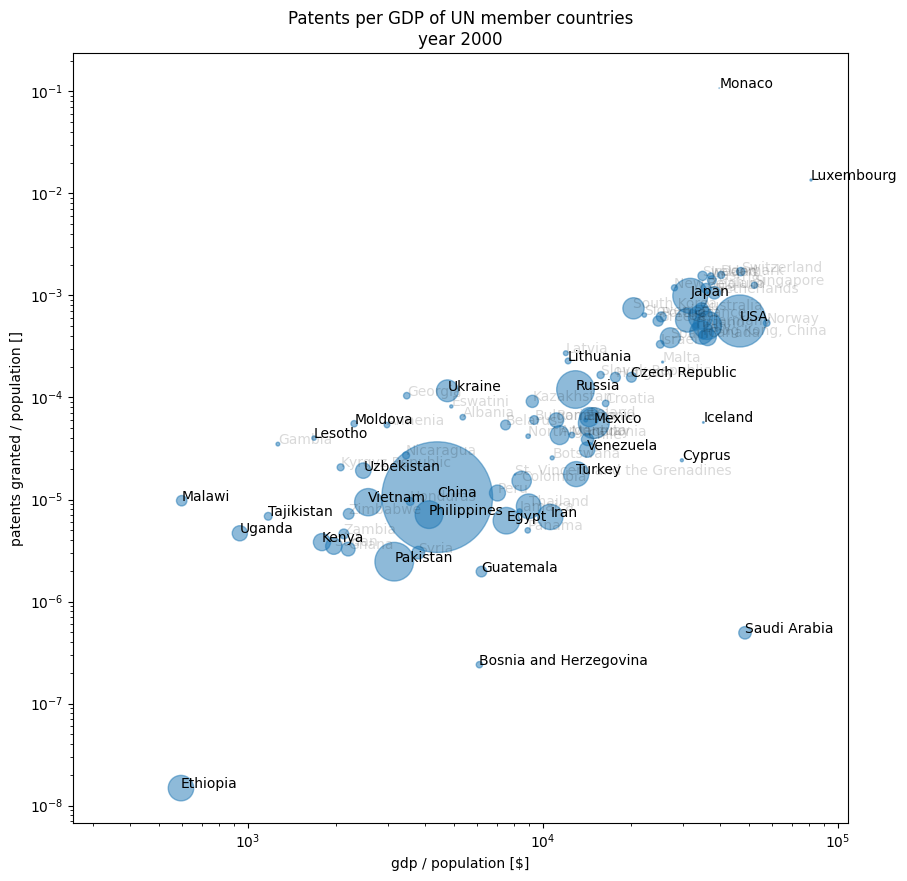

In [44]:
fig,axis = plt.subplots( 1, figsize=(10,10) )

axis.set_title("Patents per GDP of UN member countries\nyear 2000")

data["marker_size"] = data["population"] / 200000

axis.scatter( x = data["gdp_normalized"], y = data["patents_normalized"], s = data["marker_size"], alpha = 0.50 )
axis.set_xlabel('gdp / population [$]')
axis.set_ylabel('patents granted / population []')
axis.set_xscale('log')
axis.set_yscale('log')

annotations = []
for row in data.itertuples():
    annotation = axis.annotate(row.country, (row.gdp_normalized, row.patents_normalized), textcoords = 'offset pixels', xytext = (0,0) )
    annotation.data = row
    annotations.append( annotation )

for i, a in enumerate( annotations ):
    for j, b in enumerate( annotations[ i+1: ], start=i+1 ):
        bbox_a = a.get_window_extent()
        bbox_b = b.get_window_extent()
        if overlaps( bbox_a, bbox_b ):
            if a.data.country == "India":
                continue
            if a.data.population < b.data.population:
                a.set_alpha( 0.15 )
            else:
                b.set_alpha( 0.15 )

In [46]:
data[ data["population"] > 100000000 ].head( n=50 )

,country,patents,gdp,population,marker_size,gdp_normalized,patents_normalized
8,Bangladesh,0.0,1.840000e+11,1.350000e+08,675.0,1362.962963,0.000000
16,Brazil,0.0,1.940000e+12,1.740000e+08,870.0,11149.425287,0.000000
23,China,13400.0,5.580000e+12,1.270000e+09,6350.0,4393.700787,0.000011
54,Indonesia,0.0,1.170000e+12,2.160000e+08,1080.0,5416.666667,0.000000
55,India,0.0,2.710000e+12,1.060000e+09,5300.0,2556.603774,0.000000
64,Japan,126000.0,4.020000e+12,1.270000e+08,635.0,31653.543307,0.000992
91,Nigeria,0.0,3.380000e+11,1.260000e+08,630.0,2682.539683,0.000000
97,Pakistan,381.0,4.870000e+11,1.550000e+08,775.0,3141.935484,0.000002
106,Russia,17600.0,1.900000e+12,1.470000e+08,735.0,12925.170068,0.000120
131,USA,158000.0,1.310000e+13,2.810000e+08,1405.0,46619.217082,0.000562
